In [1]:
from collections import defaultdict

import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [2]:
!pip install -q ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

def get_data_from_uci(id=144):
    statlog_german_credit_data = fetch_ucirepo(id=144)

    X = statlog_german_credit_data.data.features
    y = statlog_german_credit_data.data.targets

    return X, y

X, y = get_data_from_uci(144)

In [ ]:
X.head()

Attribute1  Attribute2 Attribute3 Attribute4  Attribute5 Attribute6  \
0        A11           6        A34        A43        1169        A65   
1        A12          48        A32        A43        5951        A61   
2        A14          12        A34        A46        2096        A61   
3        A11          42        A32        A42        7882        A61   
4        A11          24        A33        A40        4870        A61   

  Attribute7  Attribute8 Attribute9 Attribute10  Attribute11 Attribute12  \
0        A75           4        A93        A101            4        A121   
1        A73           2        A92        A101            2        A121   
2        A74           2        A93        A101            3        A121   
3        A74           2        A93        A103            4        A122   
4        A73           3        A93        A101            4        A124   

   Attribute13 Attribute14 Attribute15  Attribute16 Attribute17  Attribute18  \
0           67        A143        A152            2        A173            1   
1           22        A143        A152            1        A173            1   
2           49        A143        A152            1        A172            2   
3           45        A143        A153            1        A173            2   
4           53        A143        A153            2        A173            2   

  Attribute19 Attribute20  
0        A192        A201  
1        A191        A201  
2        A191        A201  
3        A191        A201  
4        A191        A201

In [4]:
le = [
    'Attribute1',
    'Attribute3',
    'Attribute4',
    'Attribute6',
    'Attribute7',
    'Attribute9',
    'Attribute10',
    'Attribute12',
    'Attribute14',
    'Attribute15',
    'Attribute17',
    'Attribute19',
    'Attribute20',
]

In [11]:
label_enc = LabelEncoder()
label_enc.fit(X[le].to_numpy().flatten())
for col in le:
    X.loc[:, (col)] = label_enc.transform(X[col])

norm = StandardScaler()
norm.fit(X)
X = pd.DataFrame(data=norm.transform(X), columns=X.columns)

robust = RobustScaler()
robust.fit(X)
rX = pd.DataFrame(data=robust.transform(X), columns=X.columns)

X.head()

Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0   -1.108831   -1.236478    1.407772    0.256111   -0.745131    1.841216   
1   -0.699910    2.248194   -0.557932    0.256111    0.949817   -0.702467   
2    1.099344   -0.738668    1.407772    1.422016   -0.416562   -0.702467   
3   -1.108831    1.750384   -0.557932   -0.054798    1.634247   -0.702467   
4   -1.108831    0.256953    0.343015   -1.220703    0.566664   -0.702467   

   Attribute7  Attribute8  Attribute9  Attribute10  Attribute11  Attribute12  \
0    1.327505    0.918477    0.434468    -0.318813     1.046987    -1.301606   
1   -0.334785   -0.870183   -1.046111    -0.318813    -0.765977    -1.301606   
2    0.579474   -0.870183    0.434468    -0.318813     0.140505    -1.301606   
3    0.579474   -0.870183    0.434468     3.381148     1.046987    -0.380658   
4   -0.334785    0.024147    0.434468    -0.318813     1.046987     1.461237   

   Attribute13  Attribute14  Attribute15  Attribute16  Attribute17  \
0     2.766456     0.468549     0.098705     1.027079     0.162961   
1    -1.191404     0.468549     0.098705    -0.704926     0.162961   
2     1.183312     0.468549     0.098705    -0.704926    -1.525750   
3     0.831502     0.468549     2.128634    -0.704926     0.162961   
4     1.535122     0.468549     2.128634     1.027079     0.162961   

   Attribute18  Attribute19  Attribute20  
0    -0.428290     1.214598    -0.196014  
1    -0.428290    -0.823318    -0.196014  
2     2.334869    -0.823318    -0.196014  
3     2.334869    -0.823318    -0.196014  
4     2.334869    -0.823318    -0.196014

In [12]:
rX.head()

Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0   -0.185185        -1.0    1.000000    0.285714   -0.441354      1.9375   
1    0.000000         2.5    0.000000    0.285714    1.393114      0.0000   
2    0.814815        -0.5    1.000000    1.357143   -0.085739      0.0000   
3   -0.185185         2.0    0.000000    0.000000    2.133883      0.0000   
4   -0.185185         0.5    0.458333   -1.071429    0.978421      0.0000   

   Attribute7  Attribute8  Attribute9  Attribute10  Attribute11  Attribute12  \
0        1.00         0.5         0.0     0.000000          0.5    -0.461538   
1        0.00        -0.5        -1.0     0.000000         -0.5    -0.461538   
2        0.55        -0.5         0.0     0.000000          0.0    -0.461538   
3        0.55        -0.5         0.0     3.699962          0.5     0.000000   
4        0.00         0.0         0.0     0.000000          0.5     0.923077   

   Attribute13  Attribute14  Attribute15  Attribute16  Attribute17  \
0     2.266667          0.0     0.000000          1.0      0.00000   
1    -0.733333          0.0     0.000000          0.0      0.00000   
2     1.066667          0.0     0.000000          0.0     -1.68871   
3     0.800000          0.0     2.029929          0.0      0.00000   
4     1.333333          0.0     2.029929          1.0      0.00000   

   Attribute18  Attribute19  Attribute20  
0     0.000000          1.0          0.0  
1     0.000000          0.0          0.0  
2     2.763158          0.0          0.0  
3     2.763158          0.0          0.0  
4     2.763158          0.0          0.0

## Benchmarks

In [6]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [7]:
def get_benchmarks(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                    random_state=42)

    benchmarks_acc = {}

    clf = LogisticRegression(random_state=0)
    clf.fit(X_train, y_train.to_numpy().ravel())
    benchmarks_acc['LogReg'] = accuracy_score(y_test, clf.predict(X_test))

    neigh = KNeighborsClassifier(n_neighbors=10)
    neigh.fit(X_train, y_train.to_numpy().ravel())
    benchmarks_acc['KNN'] = accuracy_score(y_test, neigh.predict(X_test))

    rf = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=0)
    rf.fit(X_train, y_train.to_numpy().ravel())
    benchmarks_acc['RandForest'] = accuracy_score(y_test, rf.predict(X_test))

    return pd.DataFrame(data=benchmarks_acc.values(),
                        index=benchmarks_acc.keys(),
                        columns=['Accuracy'])


In [8]:
get_benchmarks(X, y)

Accuracy
LogReg      0.766667
KNN         0.760606
RandForest  0.760606

## EDA

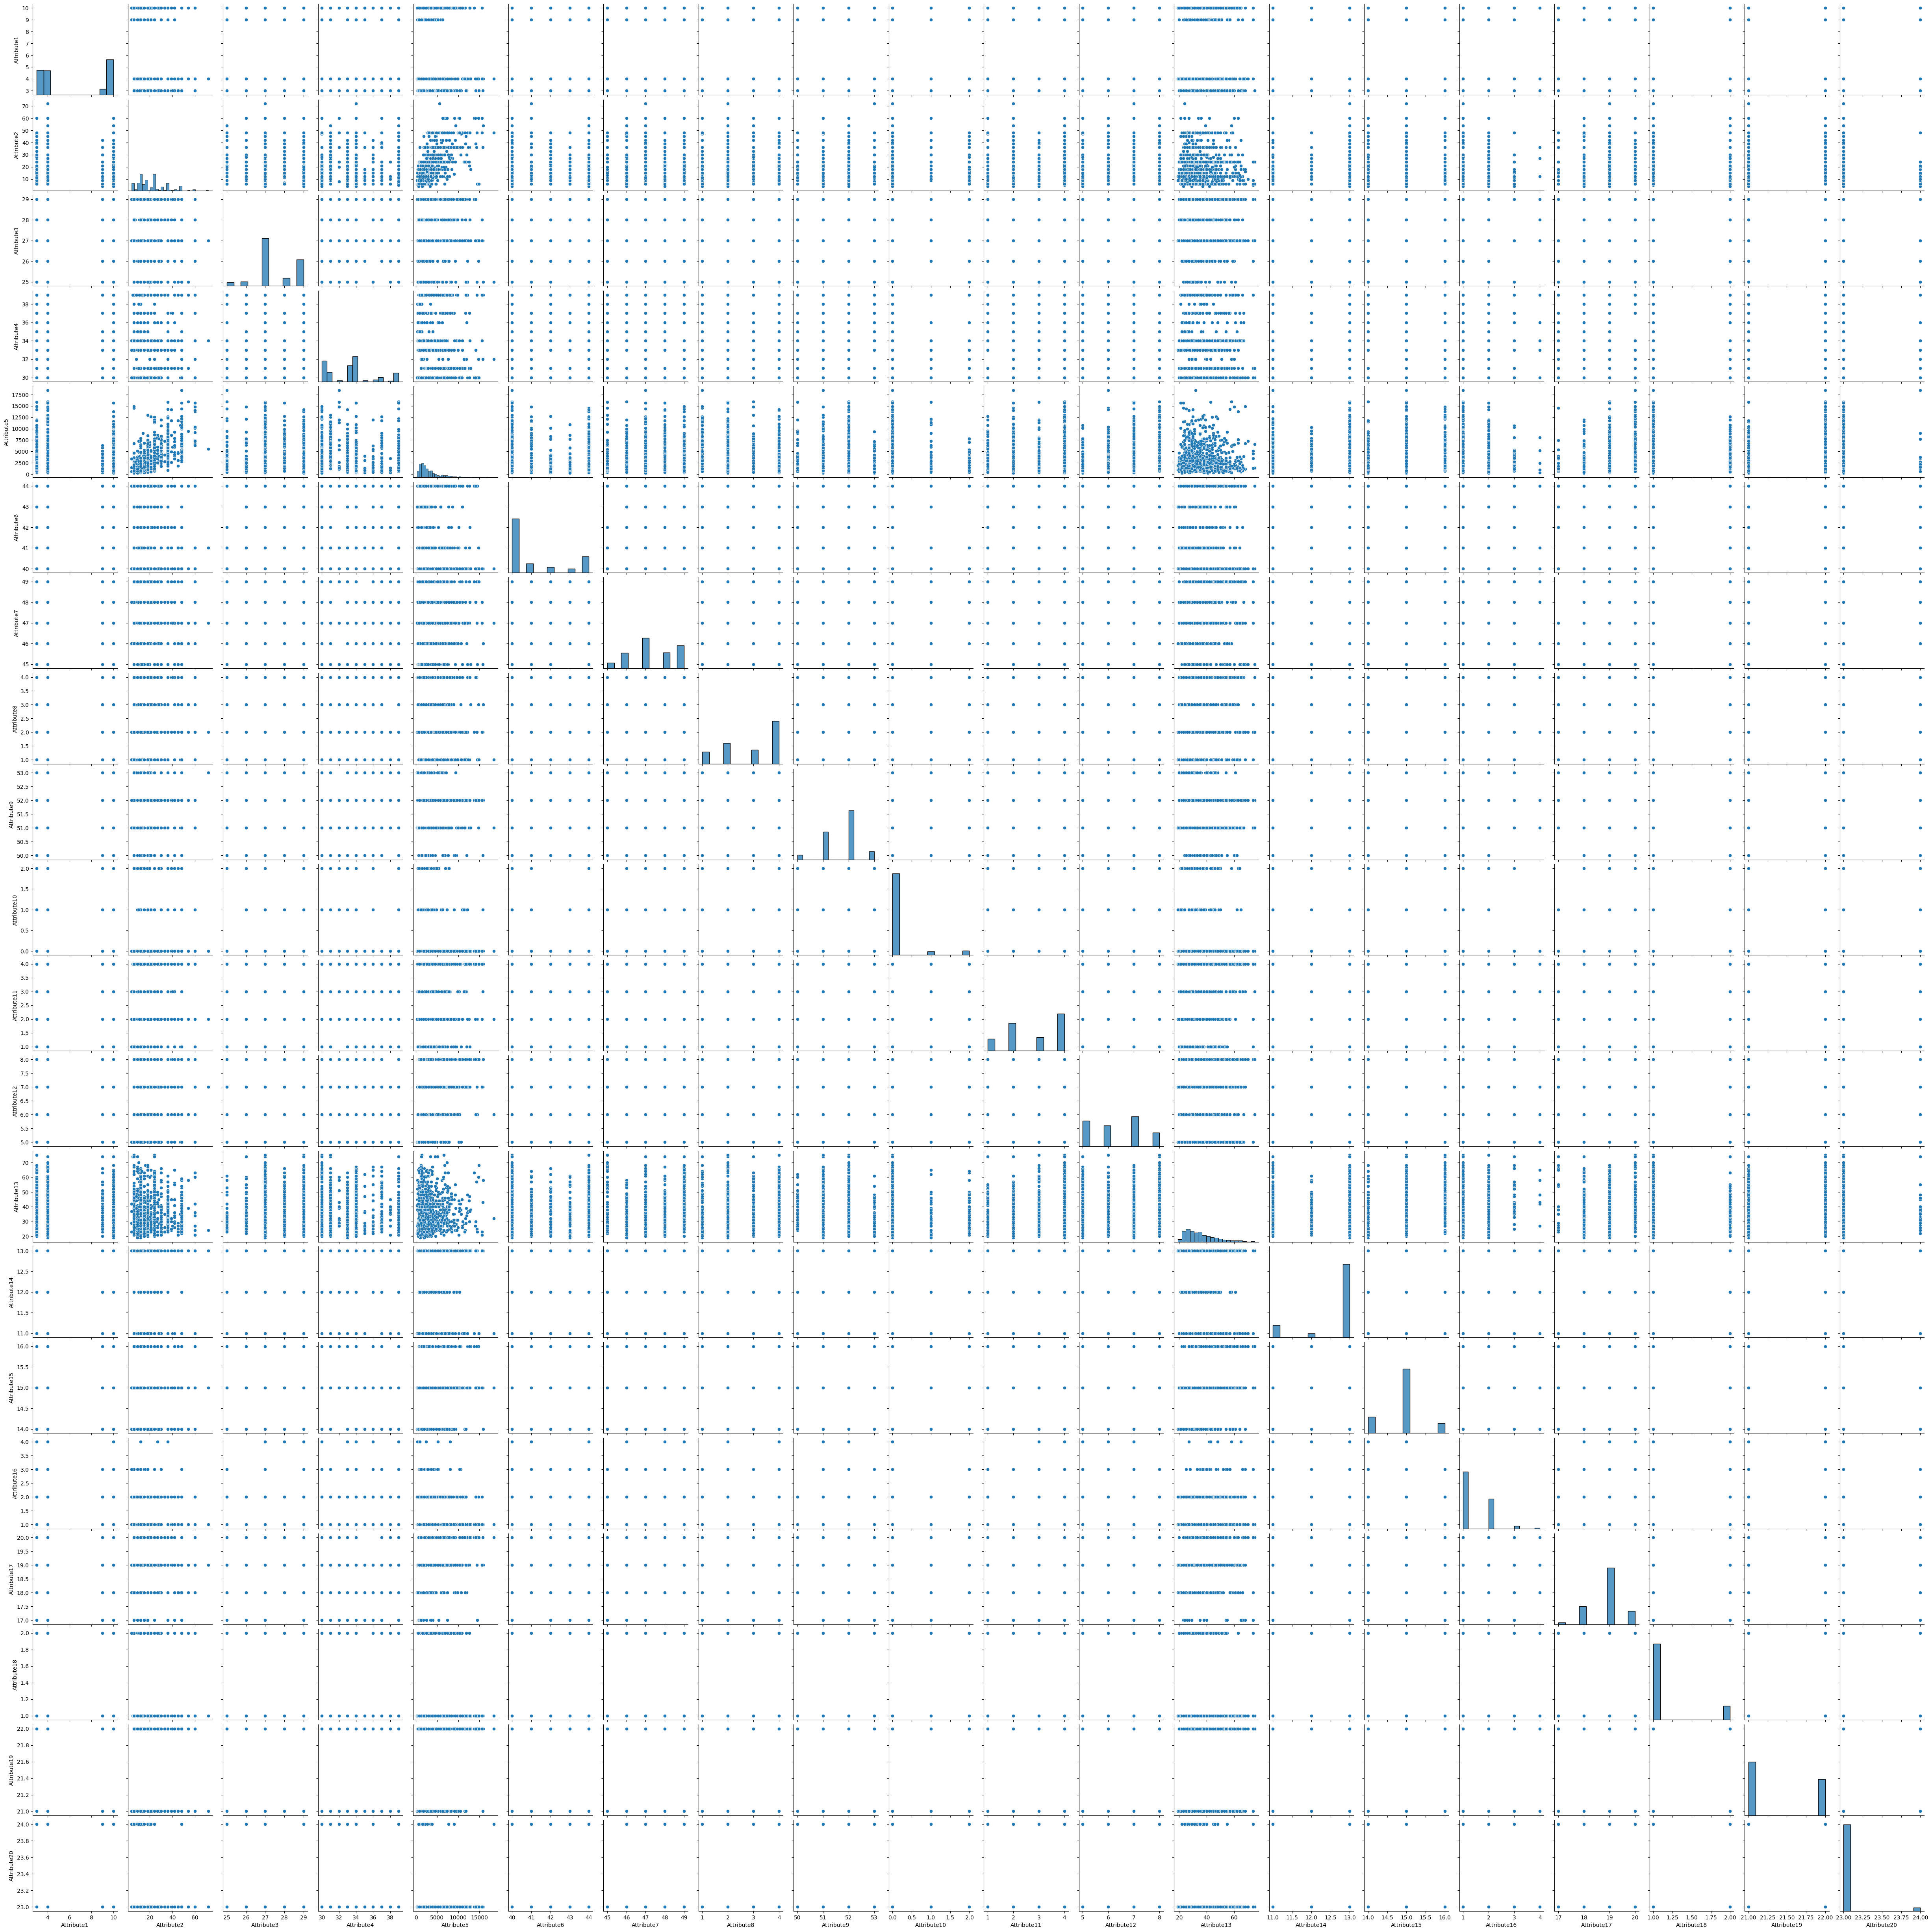

In [ ]:
sns.pairplot(X) # need to exclude 2 5 13

## K-means

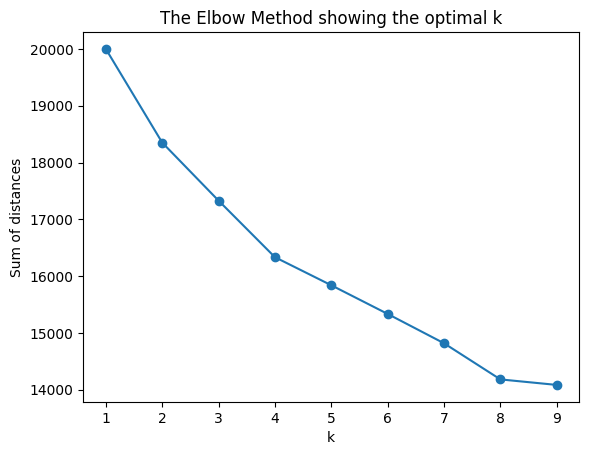

In [10]:
K = range(1, 10)
models = [KMeans(n_clusters=k).fit(X) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [13]:
DATA = {
    'all data': X,
    'without label encoder data': X.loc[:, ~X.columns.isin(le)],
    'only label encoder data': X[le]
}

robust_DATA = {
    'all data': rX,
    'without label encoder data': rX.loc[:, ~rX.columns.isin(le)],
    'only label encoder data': rX[le]
}

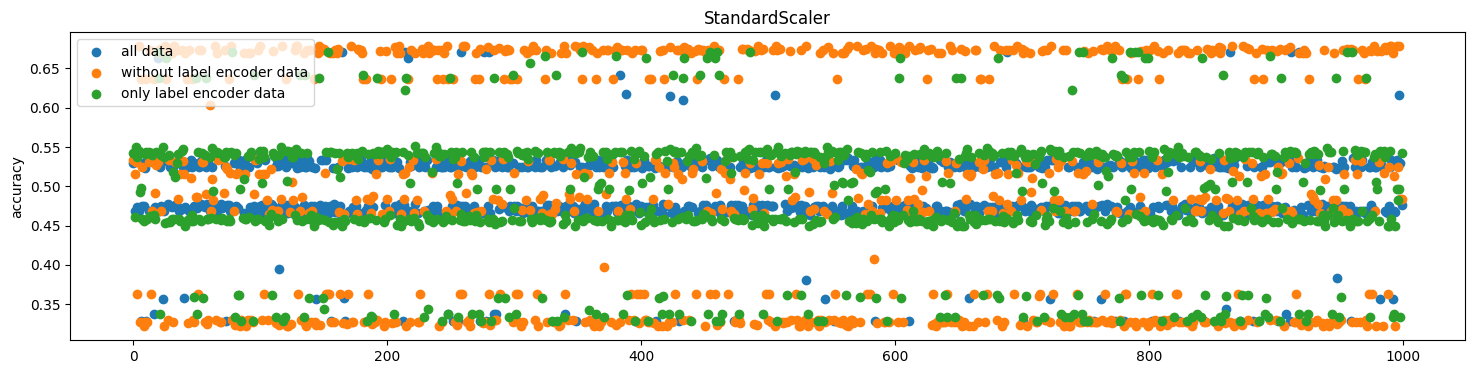

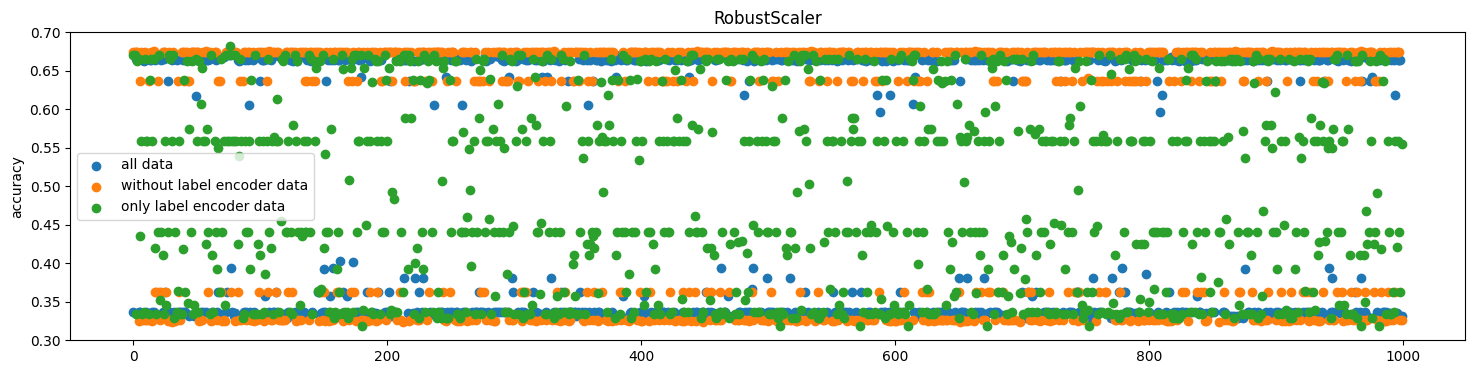

In [14]:
acc_results = {
    'StandardScaler': defaultdict(list),
    'RobustScaler': defaultdict(list),
}

model = KMeans(n_clusters=2)

plt.figure(figsize=(18, 4))
for key, data in DATA.items():
    for _ in range(1_000):
        model.fit(data)
        acc_results['StandardScaler'][key].append(accuracy_score(y, model.labels_+1))

    plt.scatter(np.arange(1_000), acc_results['StandardScaler'][key], label=key)

plt.title('StandardScaler')
plt.ylabel('accuracy')
plt.legend()


plt.figure(figsize=(18, 4))
for key, data in robust_DATA.items():
    for _ in range(1_000):
        model.fit(data)
        acc_results['RobustScaler'][key].append(accuracy_score(y, model.labels_+1))

    plt.scatter(np.arange(1_000), acc_results['RobustScaler'][key], label=key)

plt.title('RobustScaler')
plt.ylabel('accuracy')
plt.legend()


In [15]:
for scaler, results in acc_results.items():
    print(scaler)
    for key, value in results.items():
        print(key)
        print(f'max: {np.max(value)}, min: {np.min(value)}, median: {round(np.mean(value), 4)}')
        print('='*50)
    print()

StandardScaler
all data
max: 0.671, min: 0.329, median: 0.4919
without label encoder data
max: 0.678, min: 0.322, median: 0.4976
only label encoder data
max: 0.671, min: 0.329, median: 0.4892

RobustScaler
all data
max: 0.671, min: 0.329, median: 0.4999
without label encoder data
max: 0.676, min: 0.324, median: 0.525
only label encoder data
max: 0.682, min: 0.318, median: 0.493



## Change number of columns

In [16]:
df = X[le].copy()
df.head()

Attribute1  Attribute3  Attribute4  Attribute6  Attribute7  Attribute9  \
0   -1.108831    1.407772    0.256111    1.841216    1.327505    0.434468   
1   -0.699910   -0.557932    0.256111   -0.702467   -0.334785   -1.046111   
2    1.099344    1.407772    1.422016   -0.702467    0.579474    0.434468   
3   -1.108831   -0.557932   -0.054798   -0.702467    0.579474    0.434468   
4   -1.108831    0.343015   -1.220703   -0.702467   -0.334785    0.434468   

   Attribute10  Attribute12  Attribute14  Attribute15  Attribute17  \
0    -0.318813    -1.301606     0.468549     0.098705     0.162961   
1    -0.318813    -1.301606     0.468549     0.098705     0.162961   
2    -0.318813    -1.301606     0.468549     0.098705    -1.525750   
3     3.381148    -0.380658     0.468549     2.128634     0.162961   
4    -0.318813     1.461237     0.468549     2.128634     0.162961   

   Attribute19  Attribute20  
0     1.214598    -0.196014  
1    -0.823318    -0.196014  
2    -0.823318    -0.196014  
3    -0.823318    -0.196014  
4    -0.823318    -0.196014

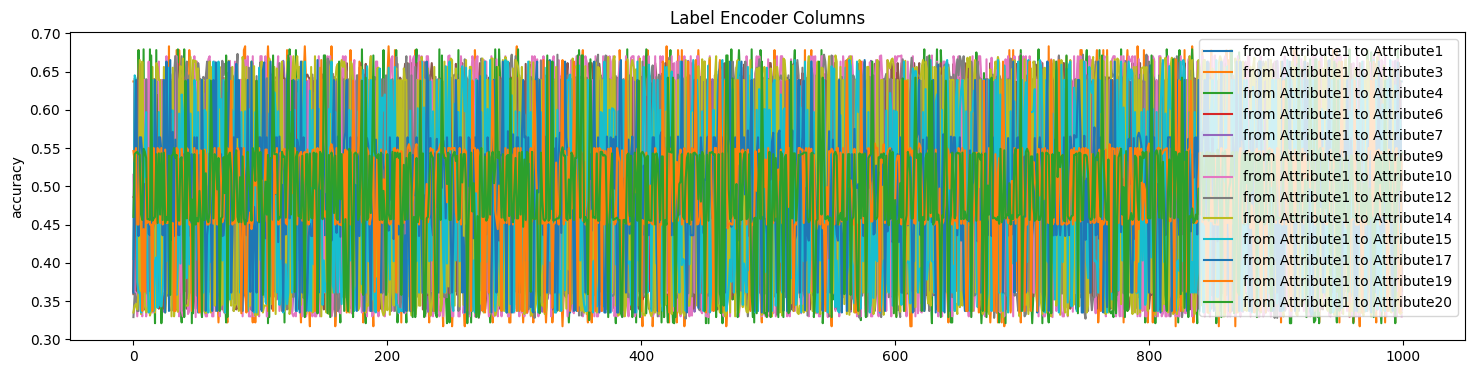

In [17]:
model = KMeans(n_clusters=2)

acc_results = defaultdict(list)
plt.figure(figsize=(18, 4))
for col in df.columns:
    for _ in range(1_000):
        model.fit(df.loc[:, df.columns[0]:col])
        acc_results[col].append(accuracy_score(y, model.labels_+1))

    plt.plot(np.arange(1_000), acc_results[col], label=f'from {df.columns[0]} to {col}')

plt.title('Label Encoder Columns')
plt.ylabel('accuracy')
plt.legend()

In [18]:
acc_df = pd.DataFrame(data=acc_results)
acc_df.head()

Attribute1  Attribute3  Attribute4  Attribute6  Attribute7  Attribute9  \
0       0.363       0.637       0.363       0.486       0.361       0.359   
1       0.363       0.637       0.431       0.488       0.637       0.641   
2       0.637       0.637       0.608       0.637       0.363       0.361   
3       0.363       0.486       0.453       0.488       0.361       0.358   
4       0.363       0.678       0.678       0.637       0.639       0.642   

   Attribute10  Attribute12  Attribute14  Attribute15  Attribute17  \
0        0.515        0.329        0.335        0.405        0.361   
1        0.361        0.360        0.344        0.645        0.542   
2        0.361        0.355        0.346        0.639        0.639   
3        0.330        0.337        0.339        0.375        0.490   
4        0.361        0.337        0.361        0.361        0.435   

   Attribute19  Attribute20  
0        0.546        0.460  
1        0.532        0.542  
2        0.550        0.544  
3        0.450        0.545  
4        0.450        0.542

In [19]:
pd.DataFrame({'max': acc_df.max(), 'mean': acc_df.mean(), 'min': acc_df.min()})

max      mean    min
Attribute1   0.637  0.492328  0.363
Attribute3   0.683  0.492901  0.317
Attribute4   0.679  0.492526  0.321
Attribute6   0.648  0.490526  0.352
Attribute7   0.664  0.497113  0.336
Attribute9   0.661  0.495131  0.339
Attribute10  0.671  0.489262  0.329
Attribute12  0.673  0.501386  0.327
Attribute14  0.671  0.487037  0.329
Attribute15  0.665  0.485780  0.335
Attribute17  0.665  0.491961  0.331
Attribute19  0.666  0.492109  0.334
Attribute20  0.671  0.491214  0.329

Text(0, 0.5, 'accuracy')

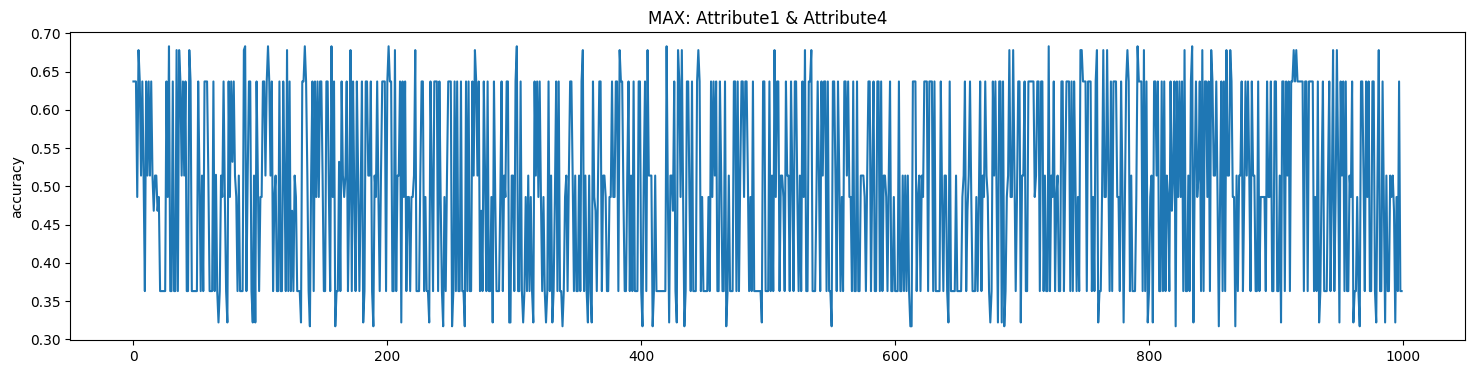

In [21]:
plt.figure(figsize=(18, 4))
plt.plot(np.arange(1_000), acc_df['Attribute3'])
plt.title('MAX: Attribute1 & Attribute4')
plt.ylabel('accuracy')

In [ ]:
#----------------------------------------

In [ ]:
df = pd.DataFrame(data=norm.fit_transform(X.loc[:, ~X.columns.isin(le)]),
                  columns=X.loc[:, ~X.columns.isin(le)].columns)
df.head()

Attribute2  Attribute5  Attribute8  Attribute11  Attribute13  Attribute16  \
0   -1.236478   -0.745131    0.918477     1.046987     2.766456     1.027079   
1    2.248194    0.949817   -0.870183    -0.765977    -1.191404    -0.704926   
2   -0.738668   -0.416562   -0.870183     0.140505     1.183312    -0.704926   
3    1.750384    1.634247   -0.870183     1.046987     0.831502    -0.704926   
4    0.256953    0.566664    0.024147     1.046987     1.535122     1.027079   

   Attribute18  
0    -0.428290  
1    -0.428290  
2     2.334869  
3     2.334869  
4     2.334869

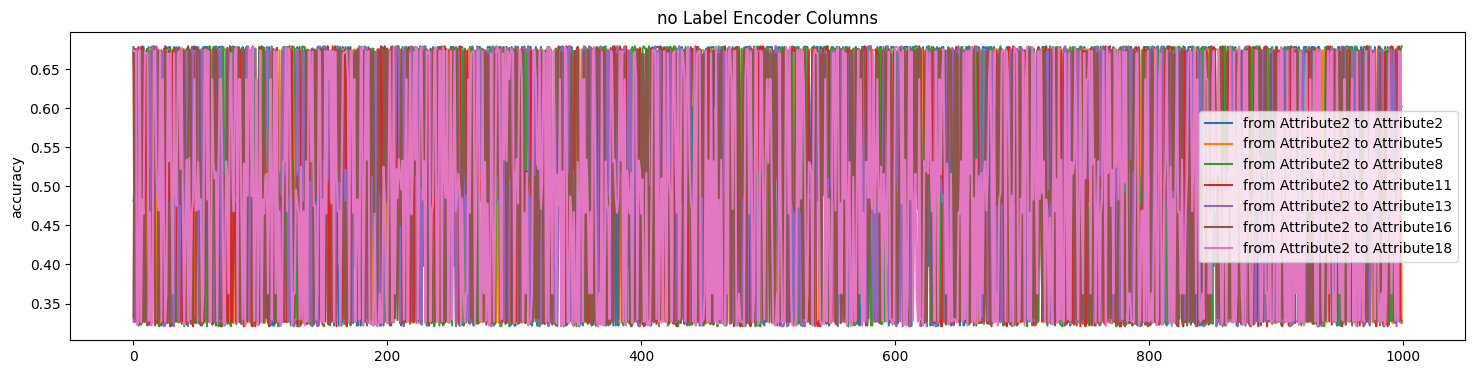

In [ ]:
model = KMeans(n_clusters=2)

acc_results = defaultdict(list)
plt.figure(figsize=(18, 4))
for col in df.columns:
    for _ in range(1_000):
        model.fit(df.loc[:, df.columns[0]:col])
        acc_results[col].append(accuracy_score(y, model.labels_+1))

    plt.plot(np.arange(1_000), acc_results[col], label=f'from {df.columns[0]} to {col}')

plt.title('no Label Encoder Columns')
plt.ylabel('accuracy')
plt.legend()

In [ ]:
acc_df = pd.DataFrame(data=acc_results)
acc_df.head()

Attribute2  Attribute5  Attribute8  Attribute11  Attribute13  Attribute16  \
0       0.678       0.674       0.482        0.673        0.327        0.331   
1       0.602       0.674       0.482        0.327        0.327        0.676   
2       0.602       0.674       0.673        0.327        0.673        0.669   
3       0.398       0.675       0.327        0.673        0.676        0.479   
4       0.322       0.675       0.327        0.678        0.328        0.325   

   Attribute18  
0        0.673  
1        0.673  
2        0.673  
3        0.323  
4        0.328

In [ ]:
pd.DataFrame({'max': acc_df.max(), 'mean': acc_df.mean(), 'min': acc_df.min()})

max      mean    min
Attribute2   0.678  0.536276  0.322
Attribute5   0.675  0.557684  0.325
Attribute8   0.679  0.522925  0.321
Attribute11  0.679  0.516925  0.321
Attribute13  0.679  0.502462  0.321
Attribute16  0.677  0.491174  0.323
Attribute18  0.678  0.491817  0.322

In [ ]:
selected_columns = ['Attribute1', 'Attribute3',] #'Attribute4', 'Attribute2', 'Attribute5']
X[selected_columns].head()

Attribute1 Attribute3
0          3         29
1          4         27
2         10         29
3          3         27
4          3         28

<ipython-input-16-2093810623>:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


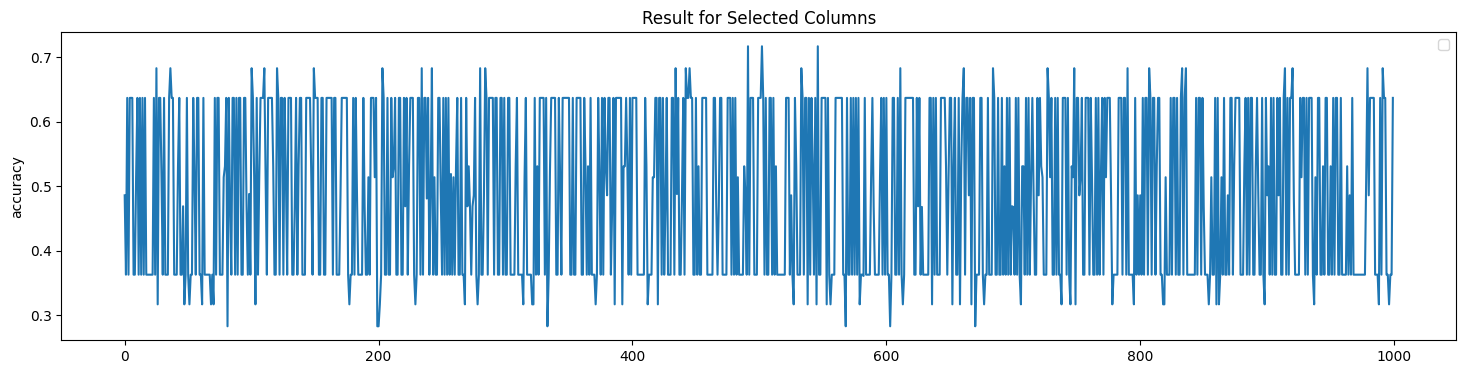

In [ ]:
data = norm.fit_transform(X[selected_columns])

model = KMeans(n_clusters=2)

acc_results = []
plt.figure(figsize=(18, 4))

for _ in range(1_000):
    model.fit(data)
    acc_results.append(accuracy_score(y, model.labels_+1))

plt.plot(np.arange(1_000), acc_results)
plt.title('Result for Selected Columns')
plt.ylabel('accuracy')
plt.legend()

In [ ]:
acc_df = pd.DataFrame(data=acc_results)
pd.DataFrame({'max': acc_df.max(), 'mean': acc_df.mean(), 'min': acc_df.min()})

max     mean    min
0  0.717  0.48941  0.283

<ipython-input-18-487694525>:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


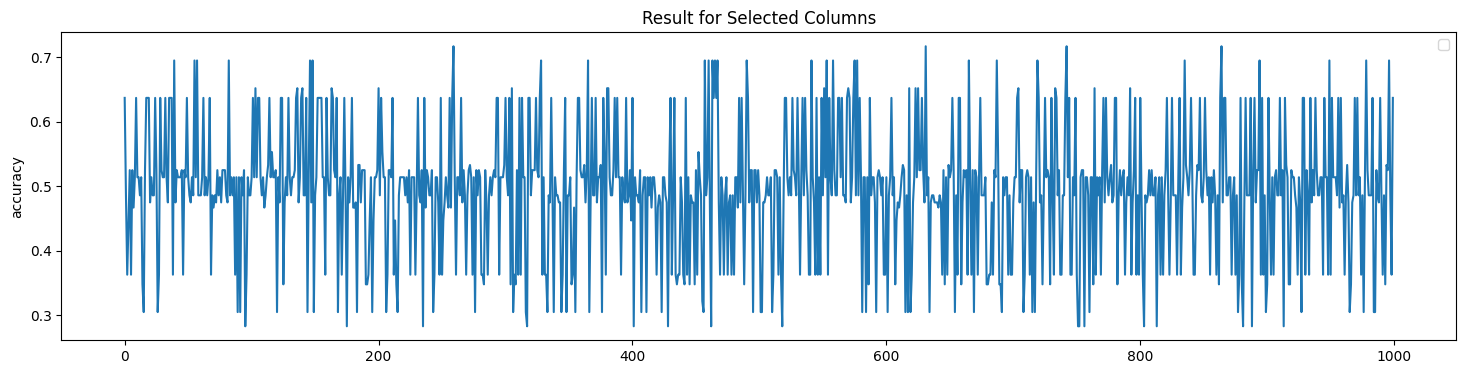

In [ ]:
data = robust.fit_transform(X[selected_columns])

model = KMeans(n_clusters=2)

acc_results = []
plt.figure(figsize=(18, 4))

for _ in range(1_000):
    model.fit(data)
    acc_results.append(accuracy_score(y, model.labels_+1))

plt.plot(np.arange(1_000), acc_results)
plt.title('Result for Selected Columns')
plt.ylabel('accuracy')
plt.legend()

In [ ]:
acc_df = pd.DataFrame(data=acc_results)
pd.DataFrame({'max': acc_df.max(), 'mean': acc_df.mean(), 'min': acc_df.min()})

max     mean    min
0  0.717  0.49361  0.283

## Combinations from selected columns

In [ ]:
from itertools import combinations

selected_columns = ['Attribute1', 'Attribute3', 'Attribute2', 'Attribute5'] # , 'Attribute4'

combs = []
for l in [2, 3, 4]:
    combs.extend(list(combinations(selected_columns, l)))


<ipython-input-21-2553775901>:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


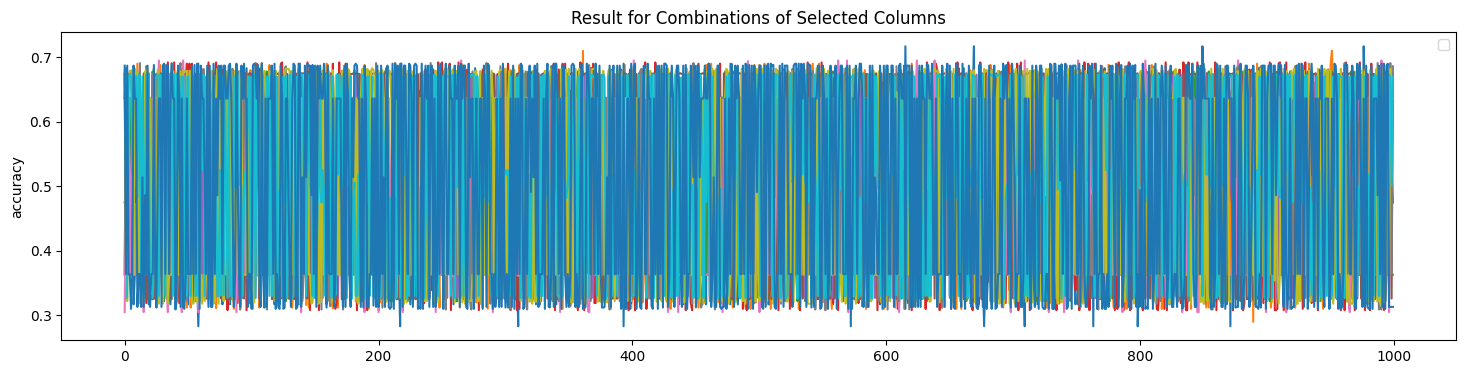

In [ ]:
model = KMeans(n_clusters=2)

acc_results = defaultdict(list)
plt.figure(figsize=(18, 4))

for cols in combs:
    data = norm.fit_transform(X[[*cols]])
    for _ in range(1_000):
        model.fit(data)
        acc_results[cols].append(accuracy_score(y, model.labels_+1))

    plt.plot(np.arange(1_000), acc_results[cols])

plt.title('Result for Combinations of Selected Columns')
plt.ylabel('accuracy')
plt.legend()


In [ ]:
acc_df = pd.DataFrame(data={'_'.join(key): value for key, value in acc_results.items()})
acc_df.head()

Attribute1_Attribute3  Attribute1_Attribute2  Attribute1_Attribute5  \
0                  0.637                  0.363                  0.363   
1                  0.683                  0.637                  0.637   
2                  0.363                  0.637                  0.363   
3                  0.363                  0.398                  0.637   
4                  0.363                  0.363                  0.637   

   Attribute3_Attribute2  Attribute3_Attribute5  Attribute2_Attribute5  \
0                  0.475                  0.673                  0.675   
1                  0.475                  0.475                  0.325   
2                  0.525                  0.475                  0.675   
3                  0.613                  0.525                  0.674   
4                  0.397                  0.525                  0.675   

   Attribute1_Attribute3_Attribute2  Attribute1_Attribute3_Attribute5  \
0                             0.305                             0.637   
1                             0.514                             0.637   
2                             0.637                             0.637   
3                             0.637                             0.637   
4                             0.363                             0.637   

   Attribute1_Attribute2_Attribute5  Attribute3_Attribute2_Attribute5  \
0                             0.680                             0.673   
1                             0.363                             0.670   
2                             0.322                             0.327   
3                             0.637                             0.670   
4                             0.679                             0.673   

   Attribute1_Attribute3_Attribute2_Attribute5  
0                                        0.687  
1                                        0.364  
2                                        0.687  
3                                        0.364  
4                                        0.364

In [ ]:
pd.DataFrame({'max': acc_df.max(), 'mean': acc_df.mean(), 'min': acc_df.min()})

max      mean    min
Attribute1_Attribute3                        0.717  0.492317  0.283
Attribute1_Attribute2                        0.710  0.484836  0.290
Attribute1_Attribute5                        0.679  0.505792  0.321
Attribute3_Attribute2                        0.692  0.505676  0.308
Attribute3_Attribute5                        0.673  0.513878  0.327
Attribute2_Attribute5                        0.675  0.561140  0.325
Attribute1_Attribute3_Attribute2             0.695  0.494167  0.305
Attribute1_Attribute3_Attribute5             0.691  0.496208  0.309
Attribute1_Attribute2_Attribute5             0.683  0.512057  0.318
Attribute3_Attribute2_Attribute5             0.675  0.521103  0.325
Attribute1_Attribute3_Attribute2_Attribute5  0.690  0.510254  0.310

<ipython-input-24-1223838849>:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


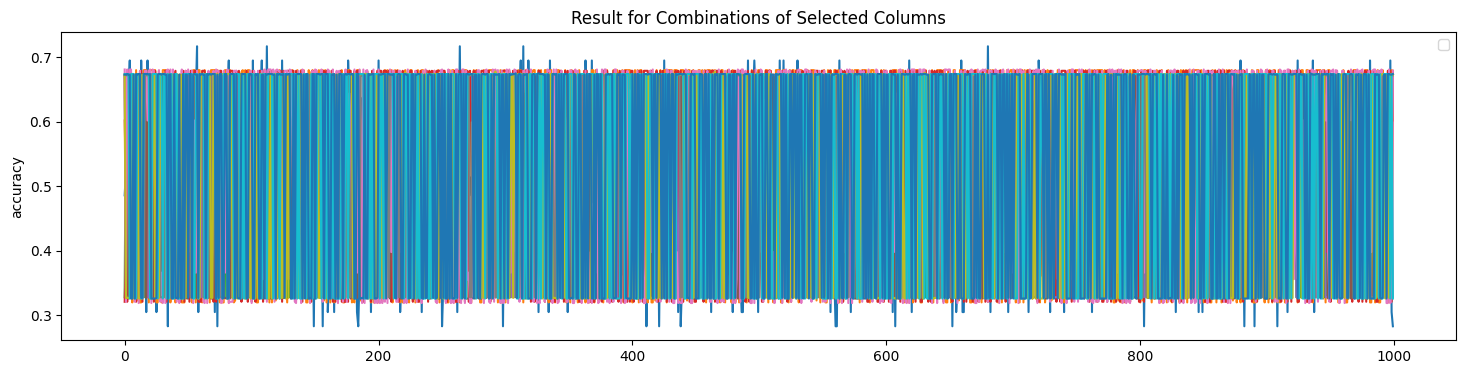

In [ ]:
model = KMeans(n_clusters=2)

acc_results = defaultdict(list)
plt.figure(figsize=(18, 4))

for cols in combs:
    data = robust.fit_transform(X[[*cols]])
    for _ in range(1_000):
        model.fit(data)
        acc_results[cols].append(accuracy_score(y, model.labels_+1))

    plt.plot(np.arange(1_000), acc_results[cols])

plt.title('Result for Combinations of Selected Columns')
plt.ylabel('accuracy')
plt.legend()

In [ ]:
acc_df = pd.DataFrame(data={'_'.join(key): value for key, value in acc_results.items()})
pd.DataFrame({'max': acc_df.max(), 'mean': acc_df.mean(), 'min': acc_df.min()})

max      mean    min
Attribute1_Attribute3                        0.717  0.494033  0.283
Attribute1_Attribute2                        0.680  0.529487  0.320
Attribute1_Attribute5                        0.672  0.571208  0.328
Attribute3_Attribute2                        0.679  0.535256  0.321
Attribute3_Attribute5                        0.672  0.571421  0.328
Attribute2_Attribute5                        0.675  0.558200  0.326
Attribute1_Attribute3_Attribute2             0.681  0.524190  0.319
Attribute1_Attribute3_Attribute5             0.672  0.564830  0.328
Attribute1_Attribute2_Attribute5             0.678  0.561153  0.326
Attribute3_Attribute2_Attribute5             0.674  0.550808  0.326
Attribute1_Attribute3_Attribute2_Attribute5  0.675  0.548886  0.326

## Exclude 2 5 13

In [ ]:
exclude_cols = ['Attribute2', 'Attribute5', 'Attribute13']
data = pd.DataFrame(data=norm.fit_transform(X.loc[:, ~X.columns.isin(exclude_cols)]),
                  columns=X.loc[:, ~X.columns.isin(exclude_cols)].columns)
data.head()

Attribute1  Attribute3  Attribute4  Attribute6  Attribute7  Attribute8  \
0   -1.063596    1.344014    0.264068    1.833169    1.338078    0.918477   
1   -0.751233   -0.503428    0.264068   -0.699707   -0.317959   -0.870183   
2    1.122945    1.344014    1.359785   -0.699707    0.510060   -0.870183   
3   -1.063596   -0.503428   -0.101171   -0.699707    0.510060   -0.870183   
4   -1.063596    0.420293   -1.196889   -0.699707   -0.317959    0.024147   

   Attribute9  Attribute10  Attribute11  Attribute12  Attribute14  \
0    0.449326    -0.303686     1.046987    -1.293723     0.460831   
1   -0.963650    -0.303686    -0.765977    -1.293723     0.460831   
2    0.449326    -0.303686     0.140505    -1.293723     0.460831   
3    0.449326     3.885083     1.046987    -0.341055     0.460831   
4    0.449326    -0.303686     1.046987     1.564281     0.460831   

   Attribute15  Attribute16  Attribute17  Attribute18  Attribute19  \
0     0.133710     1.027079     0.146949    -0.428290     1.214598   
1     0.133710    -0.704926     0.146949    -0.428290    -0.823318   
2     0.133710    -0.704926    -1.383771     2.334869    -0.823318   
3     2.016956    -0.704926     0.146949     2.334869    -0.823318   
4     2.016956     1.027079     0.146949     2.334869    -0.823318   

   Attribute20  
0    -0.196014  
1    -0.196014  
2    -0.196014  
3    -0.196014  
4    -0.196014

<ipython-input-15-4049486569>:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


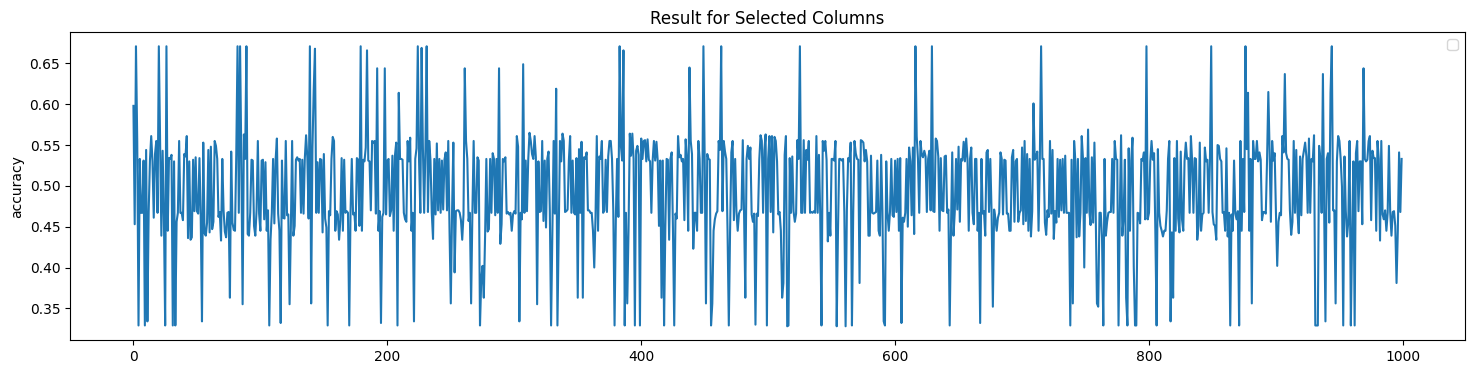

In [ ]:
model = KMeans(n_clusters=2)

acc_results = []
plt.figure(figsize=(18, 4))

for _ in range(1_000):
    model.fit(data)
    acc_results.append(accuracy_score(y, model.labels_+1))

plt.plot(np.arange(1_000), acc_results)
plt.title('Result for Selected Columns')
plt.ylabel('accuracy')
plt.legend()

In [ ]:
acc_df = pd.DataFrame(data=acc_results)
pd.DataFrame({'max': acc_df.max(), 'mean': acc_df.mean(), 'min': acc_df.min()})

max      mean    min
0  0.671  0.492734  0.328

## Atribute1 and Attribute3 combine with others Attributes

In [ ]:
col_a1a3 = ['Attribute1', 'Attribute3']

col_a1a3 + ['Att']

['Attribute1', 'Attribute3', 'Att']

In [ ]:
a = ['Attribute1', 'Attribute3', 'Att']
'_'.join(a)

'Attribute1_Attribute3_Att'

In [ ]:
X.loc[:, ~X.columns.isin(col_a1a3)].columns

Index(['Attribute2', 'Attribute4', 'Attribute5', 'Attribute6', 'Attribute7',
       'Attribute8', 'Attribute9', 'Attribute10', 'Attribute11', 'Attribute12',
       'Attribute13', 'Attribute14', 'Attribute15', 'Attribute16',
       'Attribute17', 'Attribute18', 'Attribute19', 'Attribute20'],
      dtype='object')

<ipython-input-23-1611999856>:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


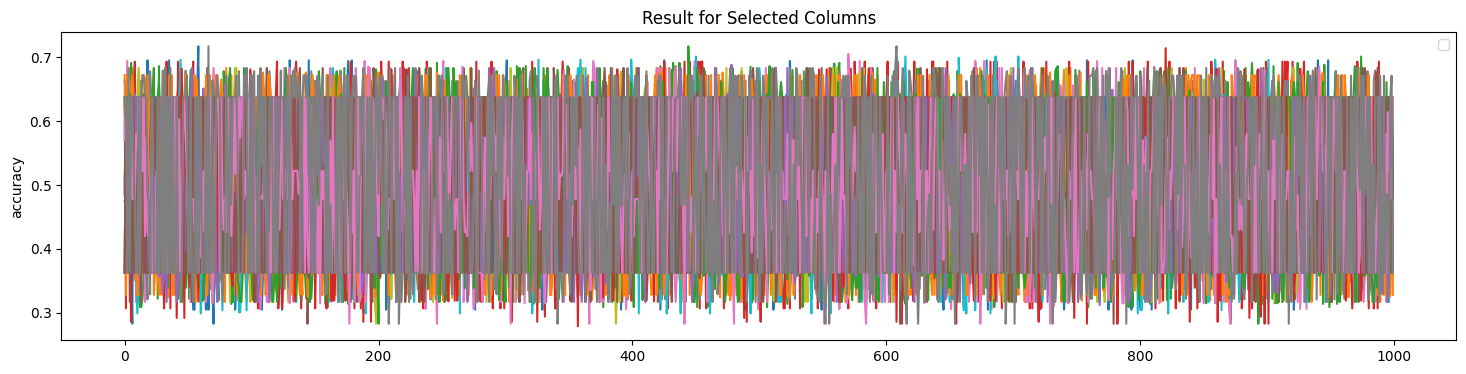

In [ ]:
data = pd.DataFrame(data=norm.fit_transform(X), columns=X.columns)
col_a1a3 = ['Attribute1', 'Attribute3']

model = KMeans(n_clusters=2)

acc_results = defaultdict(list)
plt.figure(figsize=(18, 4))

for col in data.loc[:, ~X.columns.isin(col_a1a3)].columns:
    cols = [col]+col_a1a3
    for _ in range(1_000):
        model.fit(data[cols])
        acc_results['_'.join(cols)].append(accuracy_score(y, model.labels_+1))

    plt.plot(np.arange(1_000), acc_results['_'.join(cols)])
plt.title('Result for Selected Columns')
plt.ylabel('accuracy')
plt.legend()

In [ ]:
acc_df = pd.DataFrame(data=acc_results)
pd.DataFrame({'max': acc_df.max(), 'mean': acc_df.mean(), 'min': acc_df.min()})

max      mean    min
Attribute2_Attribute1_Attribute3   0.695  0.493661  0.305
Attribute4_Attribute1_Attribute3   0.683  0.494855  0.317
Attribute5_Attribute1_Attribute3   0.691  0.498077  0.309
Attribute6_Attribute1_Attribute3   0.693  0.503138  0.283
Attribute7_Attribute1_Attribute3   0.651  0.483037  0.349
Attribute8_Attribute1_Attribute3   0.683  0.498207  0.283
Attribute9_Attribute1_Attribute3   0.694  0.492534  0.283
Attribute10_Attribute1_Attribute3  0.679  0.497911  0.283
Attribute11_Attribute1_Attribute3  0.683  0.494714  0.283
Attribute12_Attribute1_Attribute3  0.701  0.488466  0.299
Attribute13_Attribute1_Attribute3  0.717  0.504353  0.283
Attribute14_Attribute1_Attribute3  0.676  0.498428  0.324
Attribute15_Attribute1_Attribute3  0.717  0.491504  0.283
Attribute16_Attribute1_Attribute3  0.714  0.496523  0.279
Attribute17_Attribute1_Attribute3  0.688  0.494120  0.312
Attribute18_Attribute1_Attribute3  0.683  0.497198  0.317
Attribute19_Attribute1_Attribute3  0.705  0.499822  0.283
Attribute20_Attribute1_Attribute3  0.717  0.506888  0.283

In [ ]:
data = pd.DataFrame(data=norm.fit_transform(X[['Attribute1', 'Attribute3']]),
                    columns=['Attribute1', 'Attribute3'])
data.head()

Attribute1  Attribute3
0   -1.063596    1.344014
1   -0.751233   -0.503428
2    1.122945    1.344014
3   -1.063596   -0.503428
4   -1.063596    0.420293

In [ ]:
get_benchmarks(data, by)

Accuracy
LogReg      0.733333
KNN         0.721212
RandForest  0.724242

In [ ]:
data = pd.DataFrame(data=norm.fit_transform(X),
                    columns=X.columns)
model = KMeans(n_clusters=8)
model.fit(data)
data['kmeans'] = model.labels_
data.head()

Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0   -1.063596   -1.236478    1.344014    0.264068   -0.745131    1.833169   
1   -0.751233    2.248194   -0.503428    0.264068    0.949817   -0.699707   
2    1.122945   -0.738668    1.344014    1.359785   -0.416562   -0.699707   
3   -1.063596    1.750384   -0.503428   -0.101171    1.634247   -0.699707   
4   -1.063596    0.256953    0.420293   -1.196889    0.566664   -0.699707   

   Attribute7  Attribute8  Attribute9  Attribute10  ...  Attribute12  \
0    1.338078    0.918477    0.449326    -0.303686  ...    -1.293723   
1   -0.317959   -0.870183   -0.963650    -0.303686  ...    -1.293723   
2    0.510060   -0.870183    0.449326    -0.303686  ...    -1.293723   
3    0.510060   -0.870183    0.449326     3.885083  ...    -0.341055   
4   -0.317959    0.024147    0.449326    -0.303686  ...     1.564281   

   Attribute13  Attribute14  Attribute15  Attribute16  Attribute17  \
0     2.766456     0.460831     0.133710     1.027079     0.146949   
1    -1.191404     0.460831     0.133710    -0.704926     0.146949   
2     1.183312     0.460831     0.133710    -0.704926    -1.383771   
3     0.831502     0.460831     2.016956    -0.704926     0.146949   
4     1.535122     0.460831     2.016956     1.027079     0.146949   

   Attribute18  Attribute19  Attribute20  kmeans  
0    -0.428290     1.214598    -0.196014       6  
1    -0.428290    -0.823318    -0.196014       1  
2     2.334869    -0.823318    -0.196014       6  
3     2.334869    -0.823318    -0.196014       5  
4     2.334869    -0.823318    -0.196014       0  

[5 rows x 21 columns]

In [ ]:
data = pd.DataFrame(data=norm.fit_transform(data),
                    columns=X.columns.to_list()+['kmeans'])
get_benchmarks(data, by)

Accuracy
LogReg      0.760606
KNN         0.742424
RandForest  0.757576

In [ ]:
get_benchmarks(data[['Attribute1', 'Attribute3', 'kmeans']], by)

Accuracy
LogReg      0.751515
KNN         0.718182
RandForest  0.715152